In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train_LZdllcl.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


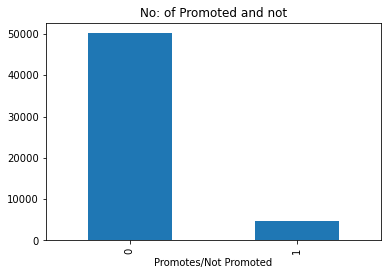

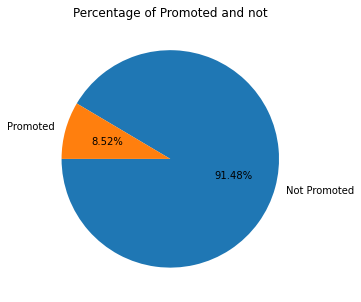

In [3]:
train['is_promoted'].value_counts().plot(kind='bar')
plt.xlabel('Promotes/Not Promoted', rotation=0)
plt.title('No: of Promoted and not')
fig, ax = plt.subplots(figsize =(5, 5))
ax.pie(train.is_promoted.value_counts(), labels = ['Not Promoted','Promoted'], 
       autopct = '%1.2f%%', startangle = 180)
ax.set_title('Percentage of Promoted and not')
plt.show()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train.shape

(54808, 14)

In [6]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [8]:
test=pd.read_csv('test_2umaH9m.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [9]:
test.shape

(23490, 13)

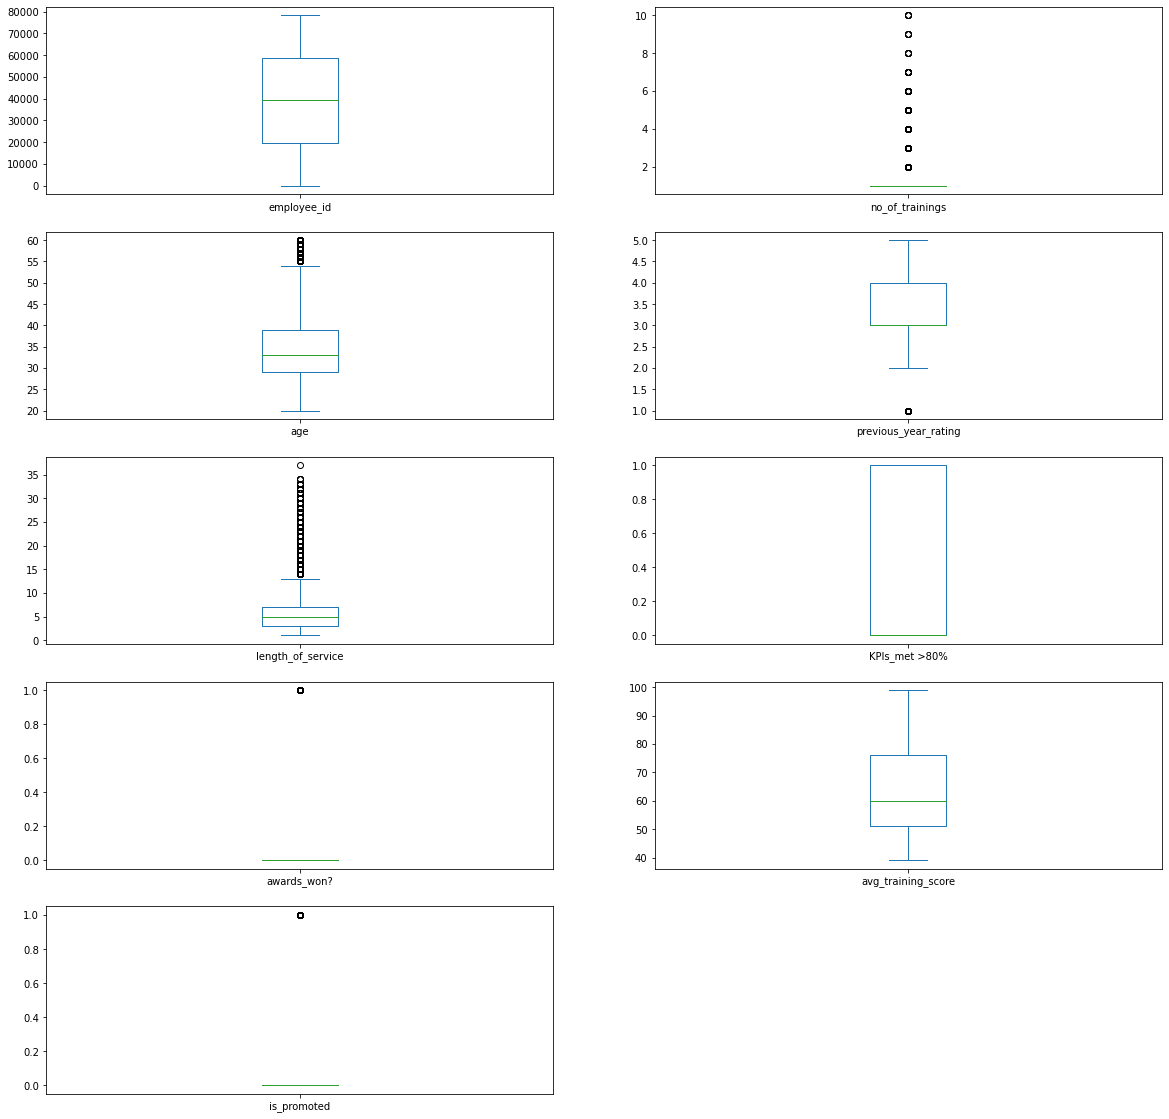

In [10]:
train.plot(kind='box',subplots=True,layout=(5,2),figsize=(20,20))
plt.show()

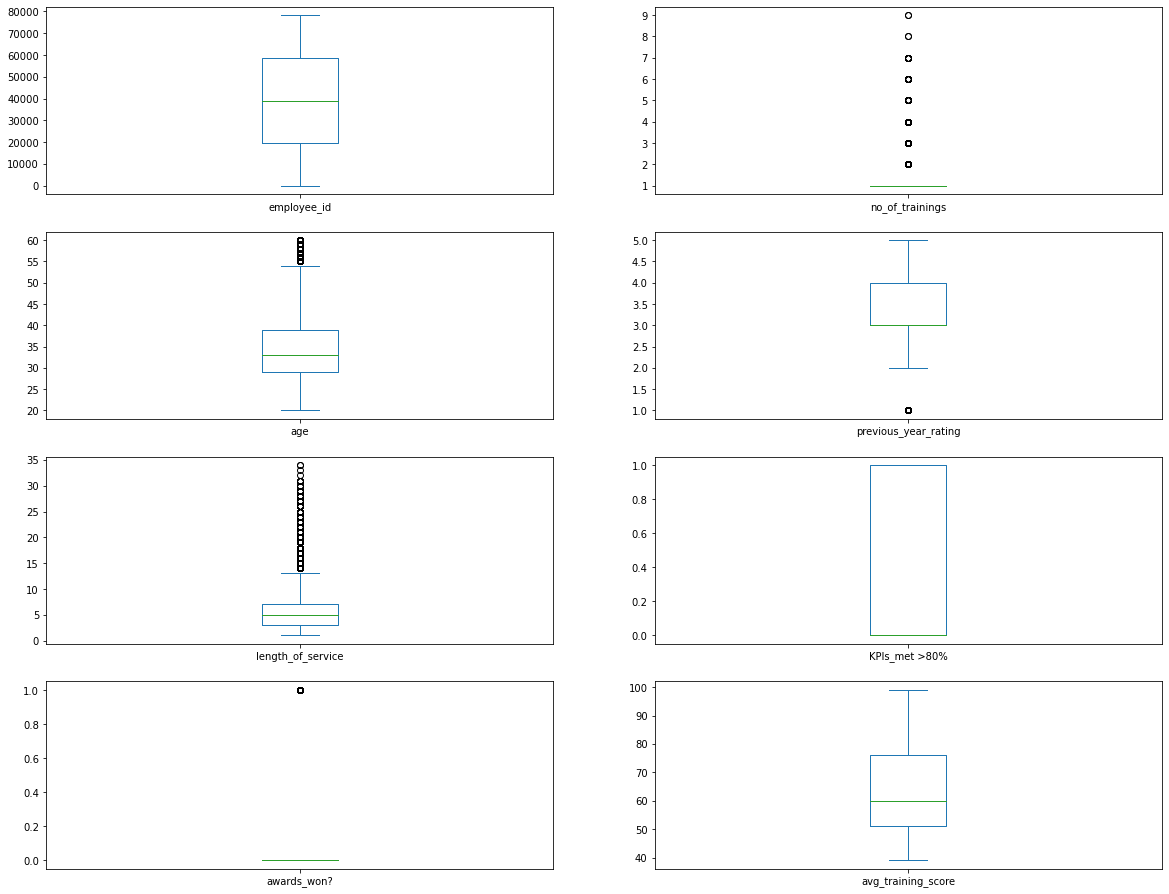

In [11]:
test.plot(kind='box',subplots=True,layout=(5,2),figsize=(20,20))
plt.show()

In [12]:
col=['age', 'length_of_service']
for x in col:
    Q1= np.percentile(train[x],25, interpolation='midpoint')
    Q2= np.percentile(train[x],50, interpolation='midpoint')
    Q3= np.percentile(train[x],75, interpolation='midpoint')
    IQR= Q3-Q1
    low_lim = Q1-1.5*IQR 
    upp_lim = Q3+1.5*IQR
    ind1 =train[x]<low_lim
    train.drop(train.loc[ind1].index,inplace= True)
    ind2 = train[x]>upp_lim
    train.drop(train.loc[ind2].index,inplace= True)

In [13]:
train['education'].mode()[0]

"Bachelor's"

In [14]:
train['education']=train['education'].fillna(train['education'].mode()[0])


In [15]:
train['previous_year_rating']=train['previous_year_rating'].ffill()


In [16]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [17]:
test['education']=test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating']=test['previous_year_rating'].bfill()

In [18]:
train['education'].replace("Master's & above",2,inplace=True)
train['education'].replace("Bachelor's",1,inplace=True)
train['education'].replace("Below Secondary",0,inplace=True)
test['education'].replace("Master's & above",2,inplace=True)
test['education'].replace("Bachelor's",1,inplace=True)
test['education'].replace("Below Secondary",0,inplace=True)

In [19]:
col=['department', 'region','recruitment_channel']

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

In [21]:
train= pd.get_dummies(train,drop_first=True)
test= pd.get_dummies(test,drop_first=True)

In [22]:
train.head()

,employee_id,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_m
0,65438,7,31,2,2,1,35,5.0,8,1,0,49,0,0
1,65141,4,14,1,0,1,30,5.0,4,0,0,60,0,1
2,7513,7,10,1,2,1,34,3.0,7,0,0,50,0,1
3,2542,7,15,1,0,2,39,1.0,10,0,0,50,0,1
4,48945,8,18,1,0,1,45,3.0,2,0,0,73,0,1


In [23]:
test.head()

,employee_id,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_m
0,8724,8,18,1,2,1,24,3.0,1,1,0,77,1
1,74430,2,28,1,0,1,31,3.0,5,0,0,51,0
2,72255,7,4,1,0,1,31,1.0,4,0,0,47,1
3,38562,5,11,1,0,3,31,2.0,9,0,0,65,0
4,64486,1,21,1,2,1,30,4.0,7,0,0,61,1


In [24]:
train=train.drop(['recruitment_channel'],axis=1)
test=test.drop(['recruitment_channel'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

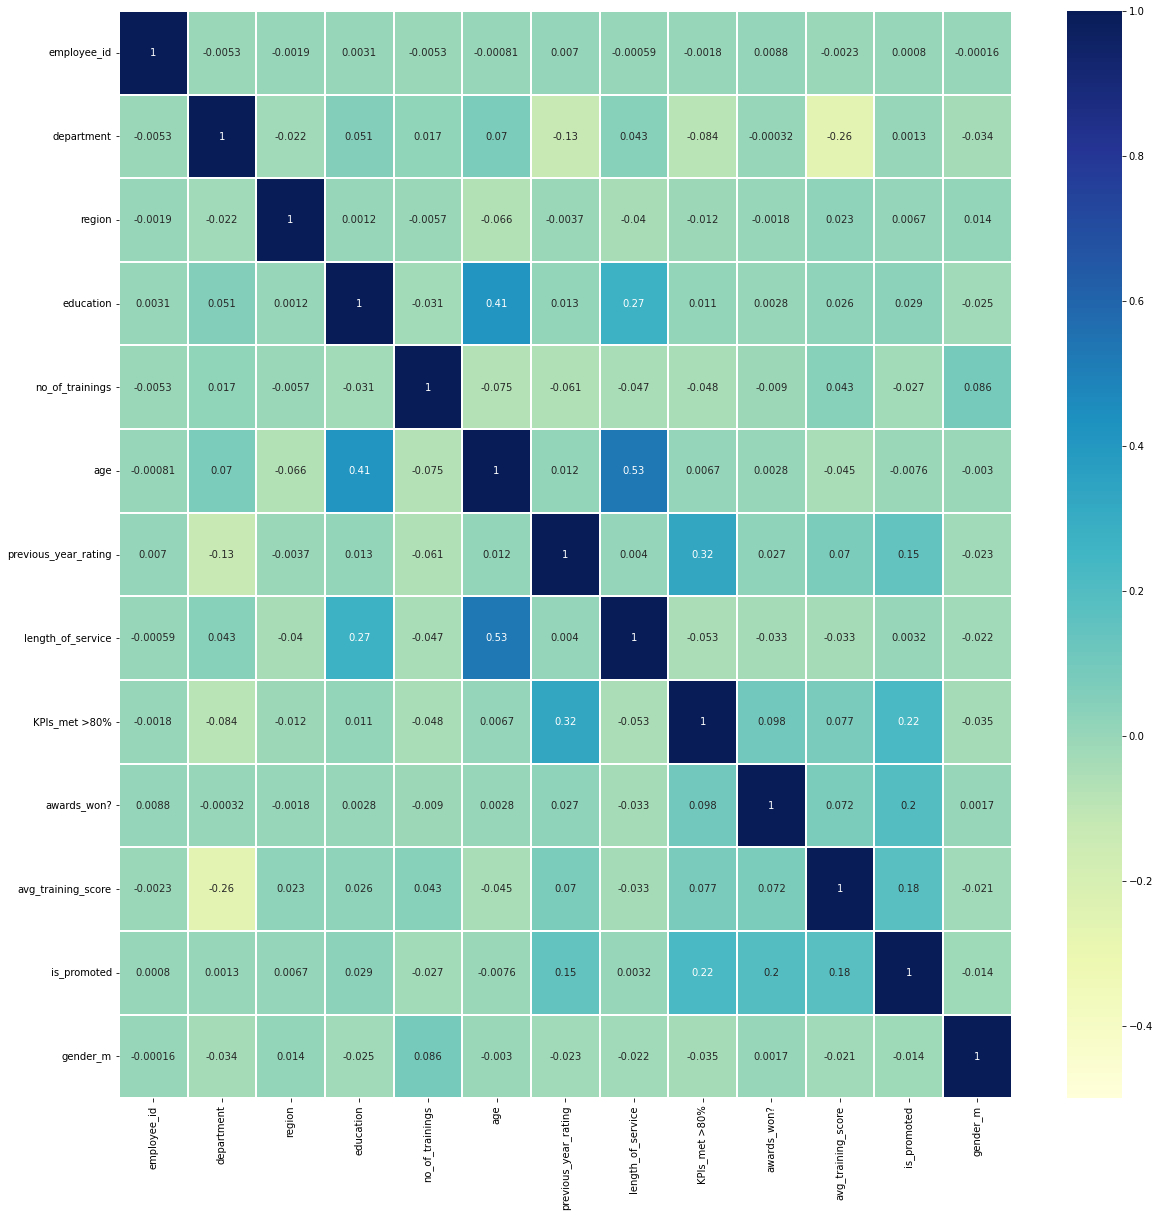

In [25]:
corr=train.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr,vmin=-0.5,vmax=1,annot=True,linewidth=0.2,cmap="YlGnBu")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

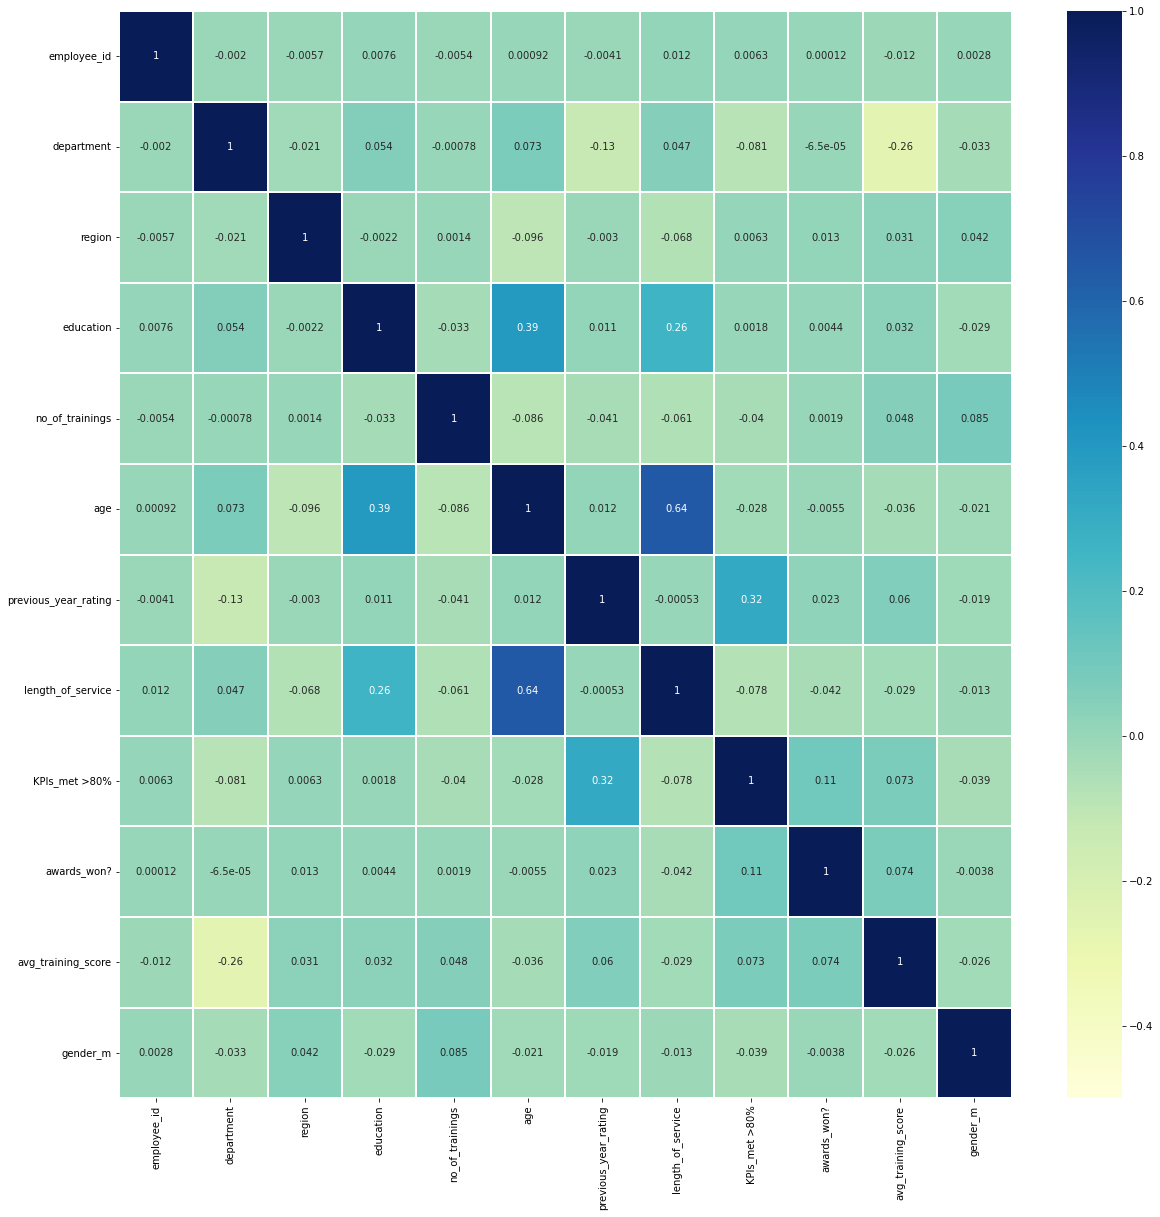

In [26]:
corr=test.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr,vmin=-0.5,vmax=1,annot=True,linewidth=0.2,cmap="YlGnBu")
plt.show

In [27]:
x=train.drop(['employee_id','is_promoted'],axis=1)
y=train['is_promoted']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [29]:
import warnings
warnings.filterwarnings('ignore')

#### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr_model= lr.fit(x_train,y_train)
lr_pred= lr_model.predict(x_test)


In [31]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
f1_lr= f1_score(y_test,lr_pred)*100
f1_lr

16.323296354992074

In [32]:
acc_lr= accuracy_score(y_test,lr_pred)*100
acc_lr

91.65085388994308

In [33]:
confusion_matrix(y_test,lr_pred)

array([[11489,   122],
       [  934,   103]], dtype=int64)

### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
acc=[]
neighbors= np.arange(1,15)
for k in neighbors:
    knn= KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn_model= knn.fit(x_train,y_train)
    knn_pred= knn_model.predict(x_test)
    accu= accuracy_score(y_test,knn_pred)
    acc.append(accu)

In [35]:
acc

[0.888124604680582,
 0.9244149272612271,
 0.9200664136622391,
 0.9290796963946869,
 0.9283681214421252,
 0.9293959519291588,
 0.928921568627451,
 0.928921568627451,
 0.928763440860215,
 0.928763440860215,
 0.9282890575585073,
 0.9285262492093611,
 0.928763440860215,
 0.9278937381404174]

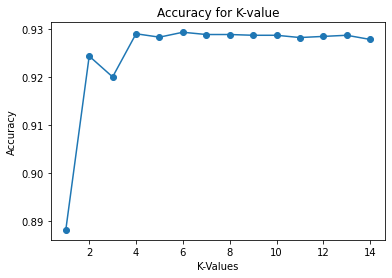

In [36]:
plt.plot(neighbors, acc,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [37]:
knn= KNeighborsClassifier(n_neighbors=12, metric='minkowski')
knn_model= knn.fit(x_train,y_train)
knn_pred= knn_model.predict(x_test)
acc_knn= accuracy_score(y_test,knn_pred)*100
acc_knn

92.85262492093611

In [38]:
f1_knn= f1_score(y_test,knn_pred)*100
f1_knn

24.161073825503358

In [39]:
confusion_matrix(y_test,knn_pred)

array([[11600,    11],
       [  893,   144]], dtype=int64)

### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model= dt.fit(x_train,y_train)
y_pred_dt= dt_model.predict(x_test)

In [41]:
f1_dt=f1_score(y_test, y_pred_dt)*100
f1_dt

41.22203098106713

In [42]:
acc_dt= accuracy_score(y_test, y_pred_dt)*100
acc_dt

89.19987349778621

In [43]:
confusion_matrix(y_test, y_pred_dt)

array([[10803,   808],
       [  558,   479]], dtype=int64)

### Random forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc_model=rfc.fit(x_train,y_train)
rfc_pred=rfc_model.predict(x_test)

In [45]:
f1_rfc=f1_score(y_test, rfc_pred)*100
f1_rfc

43.30326162387232

In [46]:
acc_rfc= accuracy_score(y_test, rfc_pred)*100
acc_rfc

93.5404807084124

In [47]:
confusion_matrix(y_test, rfc_pred)

array([[11519,    92],
       [  725,   312]], dtype=int64)

### Linear SVM

In [48]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm_model= svm.fit(x_train,y_train)
y_pred_lsvm= svm_model.predict(x_test)

In [49]:
acc_svm= accuracy_score(y_test,y_pred_lsvm)*100
f1_svm=f1_score(y_test,y_pred_lsvm)*100
confusion_matrix(y_test, y_pred_lsvm)

array([[11611,     0],
       [ 1037,     0]], dtype=int64)

In [50]:
f1_svm

0.0

In [51]:
acc_svm

91.8010752688172

### Gaussian Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb_model= gnb.fit(x_train,y_train)
y_pred_gnb= gnb_model.predict(x_test)

In [53]:
acc_gnb= accuracy_score(y_test,y_pred_gnb)*100
f1_gnb=f1_score(y_test,y_pred_gnb)*100
confusion_matrix(y_test, y_pred_gnb)

array([[11421,   190],
       [  908,   129]], dtype=int64)

In [54]:
f1_gnb

19.026548672566374

In [55]:
acc_gnb

91.31878557874764

### Bernoulli naive bayes

In [56]:
from sklearn.naive_bayes import BernoulliNB
bnb= BernoulliNB()
bnb_model= bnb.fit(x_train,y_train)
y_pred_bnb= bnb_model.predict(x_test)

In [57]:
acc_bnb= accuracy_score(y_test,y_pred_bnb)*100
f1_bnb=f1_score(y_test,y_pred_bnb)*100
confusion_matrix(y_test, y_pred_bnb)

array([[11469,   142],
       [  972,    65]], dtype=int64)

In [58]:
f1_bnb


10.450160771704178

In [59]:
acc_bnb

91.19228336495888

In [60]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'KNN',
              'Decision Tree',
              'Random Forest',
              'Linear SVM',
              'Gaussian Naive Bayes',
              'Bernoulli Naive Bayes'
              ],
    'f1-Score': [ f1_lr,
                      f1_knn, 
                      f1_dt,
                      f1_rfc,
                      f1_svm,
                      f1_gnb,
                      f1_bnb],
    'Accuracy_score':[ acc_lr,
                      acc_knn, 
                      acc_dt,
                      acc_rfc,
                      acc_svm,
                      acc_gnb,
                      acc_bnb
                     ]})

In [61]:
result_df = results.sort_values(by='f1-Score', ascending=False)
result_df.reset_index(drop=True,inplace=True)
result_df.head(10)

,Model,f1-Score,Accuracy_score
0,Random Forest,43.303262,93.540481
1,Decision Tree,41.222031,89.199873
2,KNN,24.161074,92.852625
3,Gaussian Naive Bayes,19.026549,91.318786
4,Logistic Regression,16.323296,91.650854
5,Bernoulli Naive Bayes,10.450161,91.192283
6,Linear SVM,0.000000,91.801075


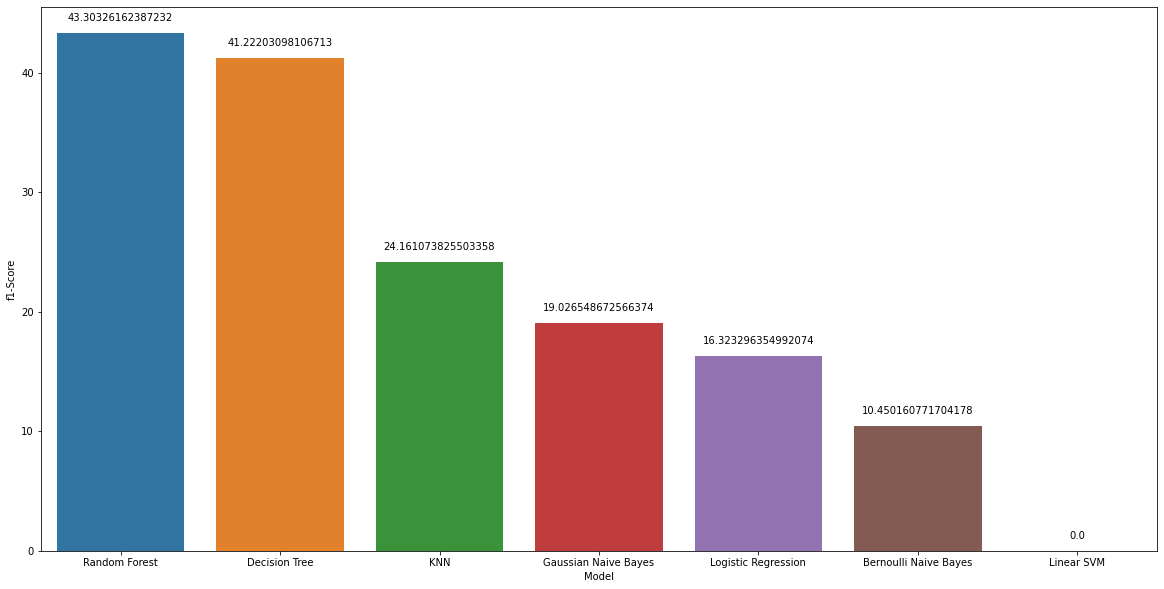

In [62]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='Model',y='f1-Score',data=result_df)
labels = (result_df['f1-Score'])
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center')

The Best model is Random Forest

test2['education']=test2['education'].fillna(test2['education'].mode()[0])
test2['previous_year_rating']=test2['previous_year_rating'].bfill()

test1 =test2

In [63]:
test1= test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]

In [64]:
predict=rfc_model.predict(test1)

In [65]:
predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [66]:
predict1=pd.DataFrame([test['employee_id'],predict])

In [67]:
predict1

,0,1,2,3,4,5,6,7,8,9,...,23480,23481,23482,23483,23484,23485,23486,23487,23488,23489
employee_id,8724,74430,72255,38562,64486,46232,54542,67269,66174,76303,...,11837,78278,27284,49291,47537,53478,25600,45409,1186,5973
Unnamed 0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
predict1=predict1.transpose()
predict1

,employee_id,Unnamed 0
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [69]:
predict1.rename(columns={'Unnamed 0': 'is_promoted'}, inplace=True)


In [70]:
predict1=predict1.set_index('employee_id')

In [71]:
prediction = pd.DataFrame(predict1).to_csv('prediction.csv')